In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
data_dir = '/Users/Karolina/ProjectsDataScience/data_science_environment/data/'
file_list = ['MyDataSpotify/StreamingHistory1.json',
             'MyDataSpotify/StreamingHistory2.json',
             'MyDataSpotify/StreamingHistory3.json',
             'MyDataSpotify/StreamingHistory4.json']

dfs = [] # an empty list to store the data frames
for file in file_list:
    data = pd.read_json(data_dir+file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [3]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-01-23 14:36,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
1,2021-01-23 14:39,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
2,2021-01-23 14:43,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
3,2021-01-23 14:46,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
4,2021-01-23 14:50,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     37735 non-null  object
 1   artistName  37735 non-null  object
 2   trackName   37735 non-null  object
 3   msPlayed    37735 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype                        
---  ------       --------------  -----                        
 0   endTime      37735 non-null  datetime64[ns]               
 1   artistName   37735 non-null  object                       
 2   trackName    37735 non-null  object                       
 3   msPlayed     37735 non-null  int64                        
 4   endTimeTz    37735 non-null  datetime64[ns, UTC]          
 5   endTimeTzEU  37735 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
df['hour'] = df.endTimeTzEU.dt.hour
df['month'] = df['endTimeTzEU'].dt.to_period('M').apply(lambda r: r.start_time)


df['sPlayed'] = df['msPlayed']/(1000)
df['mPlayed'] = df['sPlayed']/(60)
df['hPlayed'] = df['sPlayed']/(60*60)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [7]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,hour,month,sPlayed,mPlayed,hPlayed
0,2021-01-23 14:36:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:36:00+00:00,2021-01-23 15:36:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
1,2021-01-23 14:39:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:39:00+00:00,2021-01-23 15:39:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
2,2021-01-23 14:43:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:43:00+00:00,2021-01-23 15:43:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
3,2021-01-23 14:46:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:46:00+00:00,2021-01-23 15:46:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
4,2021-01-23 14:50:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:50:00+00:00,2021-01-23 15:50:00+01:00,15,2021-01-01,203.464,3.391067,0.056518


In [8]:
minutesPerMonth = pd.DataFrame(df.groupby('month')['mPlayed'].sum())
minutesPerMonth

,mPlayed
month,
2021-01-01,2557.524400
2021-02-01,8701.312250
2021-03-01,10572.627633
2021-04-01,8702.578650
2021-05-01,10382.081483
2021-06-01,7191.195233
2021-07-01,8133.350600
2021-08-01,8246.205717
2021-09-01,7072.260817


In [15]:
# had issues with cleaning cache for matplotlib
from matplotlib import font_manager

font_dirs = ['/Users/Karolina/Downloads'] 
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)



Populating the interactive namespace from numpy and matplotlib


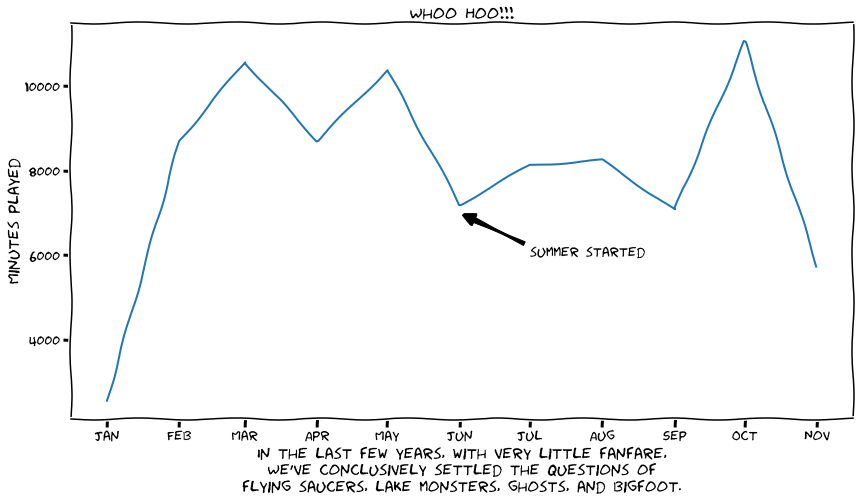

In [17]:
%pylab inline

plt.xkcd()

# set font
plt.rcParams['font.family'] = 'Humor Sans'
fig = plt.figure(figsize=(14, 16))
ax = fig.add_subplot(211)
ax.plot(minutesPerMonth)
plt.title('Whoo Hoo!!!')

# Define the date format
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)



ax.set_xlabel(("In the last few years, with very little fanfare,\n"
               "We've conclusively settled the questions of\n"
               "flying saucers, lake monsters, ghosts, and bigfoot."),
              size=16)
ax.set_ylabel("Minutes played", size=16)

#ax.text(datetime.date(2021, 7, 1), 6000, "!!!")
ax.annotate('summer started', xy=(datetime.date(2021, 6, 1), 7000), xytext=(datetime.date(2021, 7, 1), 6000),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()

In [ ]:
avg = pd.DataFrame(df.groupby('hour')['trackName'].size())

In [ ]:
avg.trackName

In [ ]:
fig = plt.figure(figsize=(7,7))

ax = plt.subplot(111, projection = 'polar')

width = (2*np.pi) / 24
ax.bar(avg.index, avg.trackName, width = width, alpha=0.3, color='red', label='Day 1')

# Make the labels go clockwise
ax.set_theta_direction(-1)

#Place Zero at Top
ax.set_theta_offset(np.pi/2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))

# set the label names
ticks = avg.index
# ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
ax.set_xticklabels(ticks)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

#Bars to the wall
#plt.ylim(0,2)

plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

In [ ]:
N = 23
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(df.hour, bins = 23)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom, alpha=0.3, color='red',)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)

plt.setp(ax.get_yticklabels(), visible=False)



plt.show()


In [ ]:
radii

In [ ]:
avg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt     

plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)

equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
ax.bar(np.deg2rad(equals), avg.trackName)       

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

plt.show()

In [ ]:
np.linspace(0, 360, 24, endpoint=False) #np.arange(24)

In [ ]:
np.linspace(0.0, 2 * np.pi, N, endpoint=False)


In [ ]:
np.linspace(0, 360, 24, endpoint=False)